<center><b><h1> Credit Card Lead Prediction Problem </center></b></h1>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Exploratory Data Analysis

## Know Data
Always try to see the shape of data and it's values.

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
train.shape

(245725, 11)

In [5]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
test.shape

(105312, 10)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


This shows that Credit_Product has missing values.

In [8]:
train.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,NNVBBKZB,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


This tells that:

ID is a unique column (Primary Key)

Gender is of twop types: Male and Female

35 unique region codes

4 Occupations

4 Channel_Code

Credit_Product and Is_Active is Yes/No

Range of data is huge in Avg_Account_Balance. Probably because of outlier.

In [9]:
train['Is_Lead'].value_counts()/len(train['Is_Lead'])

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

This shows that there are less cases of Is_Lead = 0, making it a minority class.

## Problem Statement

From the above, we can see that it is a Imbalanced Binary Classification Problem.

## Checking for missing values

Since, we have missing values in a categorical column. Since values missing are only 12%, we are replacing it with Mode.

In [10]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
train['Credit_Product'].isnull().sum()/len(train)

0.11934072642181301

In [12]:
train['Credit_Product'].mode()[0]

'No'

In [13]:
train['Credit_Product'] = train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product'] = test['Credit_Product'].fillna(train['Credit_Product'].mode()[0]) #Not a mistake

## Outlier Analysis

<AxesSubplot:xlabel='Age'>

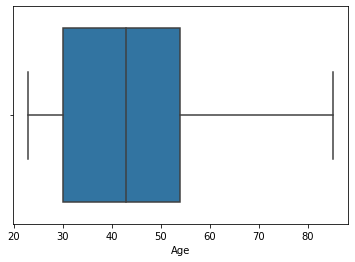

In [14]:
sns.boxplot(x = train['Age'])

No outlier in Age.

<AxesSubplot:xlabel='Vintage'>

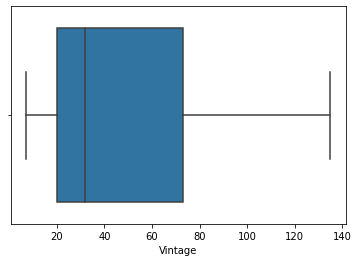

In [15]:
sns.boxplot(x = train['Vintage'])

<AxesSubplot:xlabel='Avg_Account_Balance'>

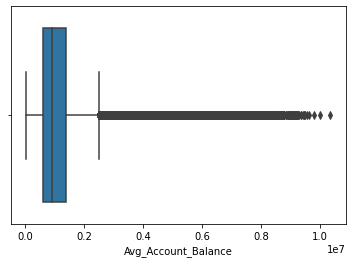

In [16]:
sns.boxplot(x = train['Avg_Account_Balance'])
# This has a lot of outliers.

## Univariate Analysis

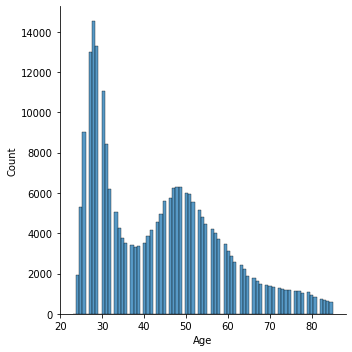

In [17]:
sns.displot(train['Age'])
# This shows that data has a huge number of people between 20-30 and distribution is not normal.

<AxesSubplot:>

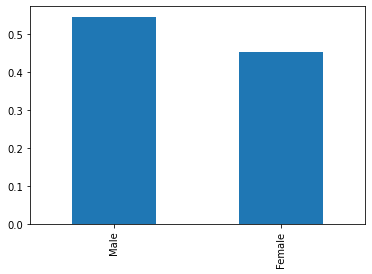

In [18]:
train['Gender'].value_counts(normalize=True).plot(kind='bar')
# This shows our data has almost 55% males and 45% females.

<AxesSubplot:>

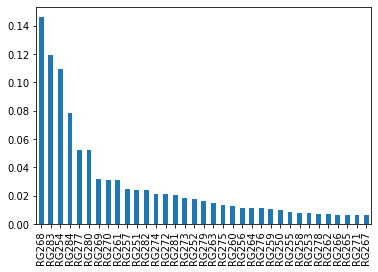

In [19]:
train['Region_Code'].value_counts(normalize=True).plot(kind='bar')
# The Distribution of region code is right skewed.

<AxesSubplot:>

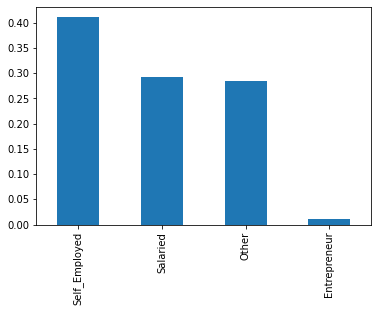

In [20]:
train['Occupation'].value_counts(normalize=True).plot(kind='bar')
# Around 40% of the people in data are Self_employed, 30% are Salaried , 25% as other and only 2-3% are entrepreneurs.

<AxesSubplot:>

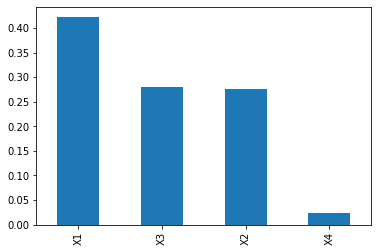

In [21]:
train['Channel_Code'].value_counts(normalize=True).plot(kind='bar')
# This shows maxiumum people from the dataset have entered from Channel X1 (40-45%)

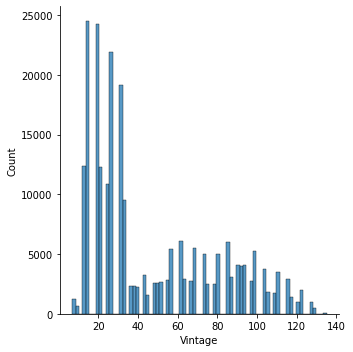

In [22]:
sns.displot(train['Vintage'])

<AxesSubplot:>

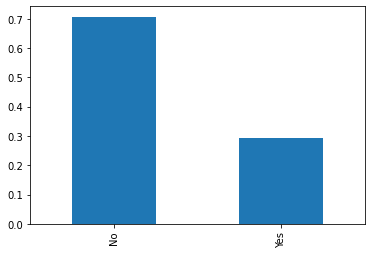

In [23]:
train['Credit_Product'].value_counts(normalize=True).plot(kind='bar')
# 70% people in the dataset don't have a Credit Product.

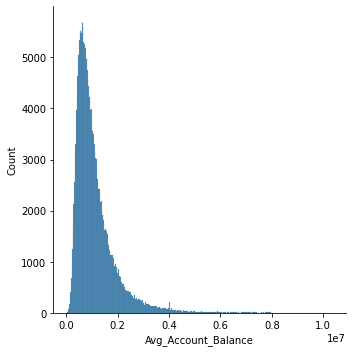

In [24]:
sns.displot(train['Avg_Account_Balance'])
# Average Account Balance is right skewed

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

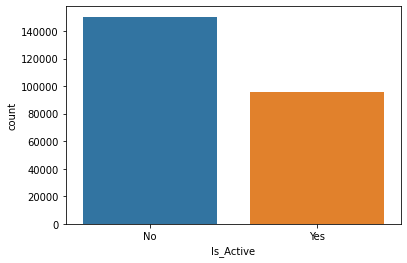

In [25]:
sns.countplot(x= train['Is_Active'])
# This shows that out of 2,45,725 people in dataset 1,40,000 are inactive which is around 60%.(shown below)

<AxesSubplot:>

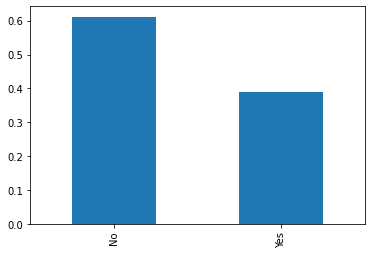

In [26]:
train['Is_Active'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

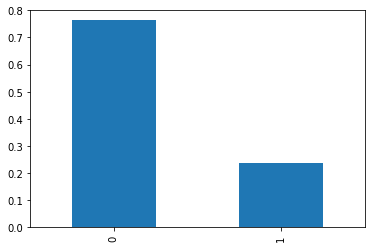

In [27]:
train['Is_Lead'].value_counts(normalize=True).plot(kind='bar')

This shows that around 75% of the data is for Category = 0 and 25% is for category = 1.

Since, we want to know who are our leads, we're concerned about Category 1 which is minority category. Hence, classification algorithms that deal with imbalance of classes must be applied.

## Bivariate Analysis

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

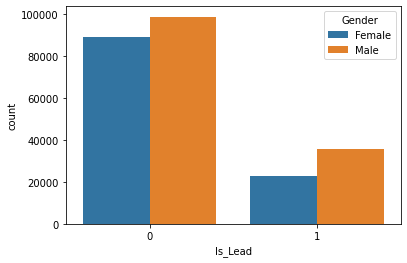

In [28]:
sns.countplot(x= train['Is_Lead'],hue='Gender',data=train)
# This shows that the number of females is less than males, irrespective of whether a person was lead or not.

<AxesSubplot:>

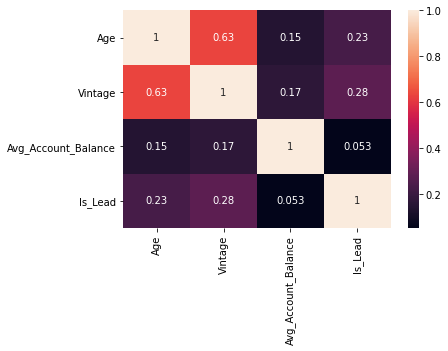

In [29]:
sns.heatmap(train.corr(),annot=True)

This shows that there is moderate positive correlation between Vintage and Age. Though it is not high and we can ignore it for now, but keep this in mind while doing analysis. Rest of the varibles have low correlation

Below Graphs, show a breakdown of Is_lead with Occupation, Channel Code Credit product and Is_Active.

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

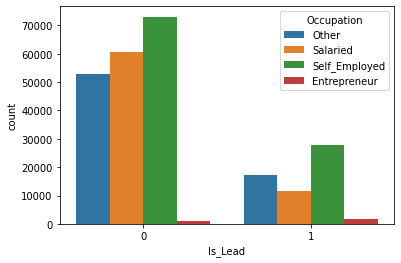

In [30]:
sns.countplot(x = train['Is_Lead'],hue='Occupation',data=train)

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

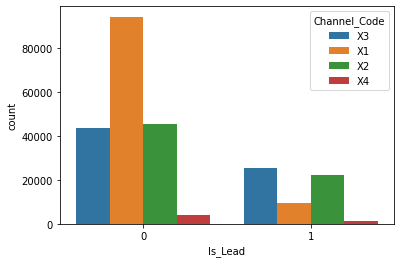

In [31]:
sns.countplot(x = train['Is_Lead'],hue = 'Channel_Code',data = train)

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

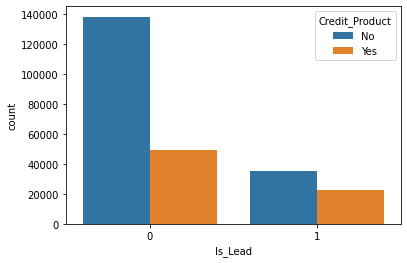

In [32]:
sns.countplot(x = train['Is_Lead'],hue='Credit_Product',data=train)

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

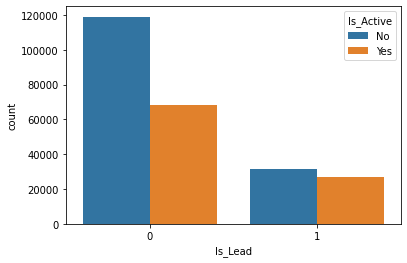

In [33]:
sns.countplot(x = train['Is_Lead'],hue='Is_Active',data=train)

## Key Points:


It's a imbalanced problem, so you need to apply some technique either SMOTENC,Over/UnderSampling or imblearn algos like BalancedRandomForest

Imputing 12% values with mode might or might not create problem, so test the model for both.

Test Data also has missing values for credit, change them using mode of training data and not test (Important).

Avg_Account_Balance has many outliers, choose a algo accordingly. Else, maybe you can change outliers with median value (You have to check accuarcy of model to decide that)

Accuracy won't be a good metric here.

When you're done, scale the data , it would be make algo run comparatively fast. Make sure to fit only train data and use the result to transfrom test data.

Be careful while scaling and imputing values, don't leak the test data to the model.

# Feature Engineering and Missing Value Imputation

In [35]:
train['Credit_Product'] = train['Credit_Product'].fillna('NA')
test['Credit_Product'] = test['Credit_Product'].fillna('NA')

In [36]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [37]:
train = train.drop(['ID'], axis=1).reset_index(drop=True)
test = test.drop(['ID'], axis=1).reset_index(drop=True)
#Keeping these untouched

In [38]:
y = train['Is_Lead']
X = train.drop(columns = ['Is_Lead'],axis=1)

In [39]:
y.shape

(245725,)

In [40]:
X.shape

(245725, 9)

# Machine Learning

In [ ]:
import warnings
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE, SMOTENC,ADASYN
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
warnings.filterwarnings('ignore')

In [41]:
X_train0, X_valid, y_train0, y_valid = train_test_split(X,y,test_size=0.2,stratify = train['Is_Lead'],random_state=1)

In [42]:
X_train0.shape

(196580, 9)

In [43]:
X_valid.shape

(49145, 9)

In [44]:
list(train.select_dtypes('O').columns)

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [45]:
X_train0 = pd.get_dummies(X_train0,drop_first=True,dummy_na = True)
X_valid = pd.get_dummies(X_valid,drop_first=True,dummy_na = True)

In [46]:
X_train0.shape, X_valid.shape

((196580, 52), (49145, 52))

In [47]:
y_train0.shape, y_valid.shape

((196580,), (49145,))

In [48]:
Counter(y_train0)

Counter({1: 46630, 0: 149950})

## Adding Synthetic Data

In [49]:
smot = ADASYN(random_state = 43, n_neighbors=5)  # => BEST 
X_train0, y_train0 =  smot.fit_resample(X_train0, y_train0)

In [50]:
Counter(y_train0)

Counter({1: 143607, 0: 149950})

## Scaling Data

In [51]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_train0=scaler.fit_transform(X_train0)
X_valid=scaler.transform(X_valid)

## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train0,y_train0)
predictions = rf.predict(X_valid)
roc_auc_score(y_valid, predictions)
#0.6245 before scaling

0.6251000409712572

## LightGBM

In [53]:
param_grid = {'n_estimators' : np.random.randint(10,500,5),
              'learning_rate' :[0.001, 0.01, 0.01, 0.1, 1, 10 ]
             }
param_grid

{'n_estimators': array([258,  99, 460, 114, 133]),
 'learning_rate': [0.001, 0.01, 0.01, 0.1, 1, 10]}

In [54]:
# gbdt = lgb.LGBMClassifier()
# grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, scoring='roc_auc',return_train_score=True, cv = 3)
# grid_search.fit(X_train0, y_train0)

In [55]:
#grid_search.best_params_

In [56]:
clf = lgb.LGBMClassifier(learning_rate = 0.1, n_estimators = 182, random_state = 1)

clf.fit(X_train0, y_train0)

LGBMClassifier(n_estimators=182, random_state=1)

In [57]:
y_pred = clf.predict(X_valid)
roc_auc_score(y_valid, y_pred)

0.6172677106207248

## Balanced Random Forest

In [58]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators = 200)
brf.fit(X_train0,y_train0)
predictions = brf.predict(X_valid)
roc_auc_score(y_valid, predictions)
#Since, its a balaned random forest, so you can skip adding synthetic data step if using this. This automatically does that to make balanced data.

0.6306851886843619

Note:

This is a actual hackathon problem, so correct labels for test data isn't provided. In Hackathons, after doing all these steps, we predict labels for test data and submit our csv files. The scores are then displayed on Dashboard.